In [1]:
import dataclient
import pandas as pd
import configparser

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use("seaborn-notebook")
%matplotlib inline
import pprint

from Wrapper import *

In [2]:
#m = dataclient.MDALClient("corbusier.cs.berkeley.edu:8088")
mdal_obj = Import_MDAL()

site = "ciee"
start = '2018-07-01T00:00:00Z'
end = '2018-10-22T00:00:00Z'

site_event_mapping = {
    'avenal-public-works-yard': '2017-12-04',
    'avenal-movie-theatre': '2017-11-14',
    'avenal-recreation-center': '2017-11-21',
    'avenal-animal-shelter': '2017-11-21',
    'avenal-veterans-hall': '2017-12-07',
    'south-berkeley-senior-center': '2017-12-14',
    'north-berkeley-senior-center': '2017-08-24',
    'hayward-station-1': '2017-12-19',
    'hayward-station-8': '2017-12-19',
    'orinda-community-center': '2017-11-02',
    'ciee': '2017-06-07',
    'berkeley-corporate-yard': '2017-10-11'
}

In [3]:
obj2 =  mdal_obj.get_meter(site=site, start=start, end=end, var='meter', agg='MEAN', window='15min', aligned=True, return_names=True)
obj2.df.head()

Green_Button_Meter1
2018-06-30 17:00:00-07:00                560.0
2018-06-30 17:15:00-07:00                520.0
2018-06-30 17:30:00-07:00                560.0
2018-06-30 17:45:00-07:00                520.0
2018-06-30 18:00:00-07:00                520.0

In [4]:
obj3 = mdal_obj.get_weather(site=site, start=start, end=end, var='weather', agg='MEAN', window='15min', aligned=True, return_names=True)
obj3.df.head()

Weather_Temperature_Sensor1  \
2018-06-30 17:00:00-07:00                        64.04   
2018-06-30 17:15:00-07:00                          NaN   
2018-06-30 17:30:00-07:00                          NaN   
2018-06-30 17:45:00-07:00                          NaN   
2018-06-30 18:00:00-07:00                          NaN   

                           Weather_Temperature_Sensor2  
2018-06-30 17:00:00-07:00                      55.2596  
2018-06-30 17:15:00-07:00                          NaN  
2018-06-30 17:30:00-07:00                          NaN  
2018-06-30 17:45:00-07:00                          NaN  
2018-06-30 18:00:00-07:00                          NaN

Check that there is no mistake of replacing a Nan value with 32 deg F

In [5]:
obj3.df[obj3.df['Weather_Temperature_Sensor1']<40]
#if the df is empty or the low temperatures areoccuring at a reasonable TOD then we can assume the data is correct

Weather_Temperature_Sensor1  \
2018-10-21 13:00:00-07:00                          0.0   
2018-10-21 13:15:00-07:00                          0.0   
2018-10-21 13:30:00-07:00                          0.0   
2018-10-21 13:45:00-07:00                          0.0   
2018-10-21 14:00:00-07:00                          0.0   
2018-10-21 14:15:00-07:00                          0.0   
2018-10-21 14:30:00-07:00                          0.0   
2018-10-21 14:45:00-07:00                          0.0   
2018-10-21 15:00:00-07:00                          0.0   
2018-10-21 15:15:00-07:00                          0.0   
2018-10-21 15:30:00-07:00                          0.0   
2018-10-21 15:45:00-07:00                          0.0   
2018-10-21 16:00:00-07:00                          0.0   
2018-10-21 16:15:00-07:00                          0.0   
2018-10-21 16:30:00-07:00                          0.0   
2018-10-21 16:45:00-07:00                          0.0   

                           Weather_Temperature_Sensor2  
2018-10-21 13:00:00-07:00                    58.209800  
2018-10-21 13:15:00-07:00                    58.280000  
2018-10-21 13:30:00-07:00                    59.199800  
2018-10-21 13:45:00-07:00                    59.090000  
2018-10-21 14:00:00-07:00                    60.319400  
2018-10-21 14:15:00-07:00                    59.610200  
2018-10-21 14:30:00-07:00                    59.709200  
2018-10-21 14:45:00-07:00                    59.790200  
2018-10-21 15:00:00-07:00                    60.659600  
2018-10-21 15:15:00-07:00                    61.910600  
2018-10-21 15:30:00-07:00                    61.190600  
2018-10-21 15:45:00-07:00                    61.520000  
2018-10-21 16:00:00-07:00                    61.219400  
2018-10-21 16:15:00-07:00                    60.429200  
2018-10-21 16:30:00-07:00                    60.830600  
2018-10-21 16:45:00-07:00                    59.579636

In [6]:
obj3.df[obj3.df['Weather_Temperature_Sensor2']<40]

Weather_Temperature_Sensor1  \
2018-08-04 23:00:00-07:00                        60.08   
2018-08-04 23:15:00-07:00                        59.00   
2018-08-04 23:30:00-07:00                        59.00   
2018-08-04 23:45:00-07:00                        59.00   
2018-08-05 00:00:00-07:00                        59.00   
2018-08-05 00:15:00-07:00                        59.00   
2018-08-05 00:30:00-07:00                        59.00   
2018-08-05 00:45:00-07:00                        59.00   
2018-08-05 01:00:00-07:00                        59.00   
2018-08-05 01:15:00-07:00                        57.92   
2018-08-05 01:30:00-07:00                        57.92   
2018-08-05 01:45:00-07:00                        57.92   
2018-08-05 02:00:00-07:00                        57.92   
2018-08-05 02:15:00-07:00                        55.04   
2018-08-05 02:30:00-07:00                        55.04   
2018-08-05 02:45:00-07:00                        55.04   
2018-08-05 03:00:00-07:00                        55.04   
2018-08-05 03:15:00-07:00                        51.98   
2018-08-05 03:30:00-07:00                        51.98   
2018-08-05 03:45:00-07:00                        51.98   
2018-08-05 04:00:00-07:00                        51.98   
2018-08-05 04:15:00-07:00                        53.96   
2018-08-05 04:30:00-07:00                        53.96   
2018-08-05 04:45:00-07:00                        53.96   
2018-08-05 05:00:00-07:00                        53.96   
2018-08-05 05:15:00-07:00                        55.04   
2018-08-05 05:30:00-07:00                        55.04   
2018-08-05 05:45:00-07:00                        55.04   
2018-08-05 06:00:00-07:00                        55.04   
2018-08-05 06:15:00-07:00                        57.02   
...                                                ...   
2018-08-05 17:45:00-07:00                        68.00   
2018-08-05 18:00:00-07:00                        68.00   
2018-08-05 18:15:00-07:00                        68.00   
2018-08-05 18:30:00-07:00                        68.00   
2018-08-05 18:45:00-07:00                        68.00   
2018-08-05 19:00:00-07:00                        68.00   
2018-08-05 19:15:00-07:00                        68.00   
2018-08-05 19:30:00-07:00                        64.04   
2018-08-05 19:45:00-07:00                        64.04   
2018-08-05 20:00:00-07:00                        64.04   
2018-08-05 20:15:00-07:00                        64.04   
2018-08-05 20:30:00-07:00                        62.06   
2018-08-05 20:45:00-07:00                        62.06   
2018-08-05 21:00:00-07:00                        62.06   
2018-08-05 21:15:00-07:00                        60.08   
2018-08-05 21:30:00-07:00                        60.08   
2018-08-05 21:45:00-07:00                        60.08   
2018-08-05 22:00:00-07:00                        60.08   
2018-08-05 22:15:00-07:00                        60.08   
2018-08-05 22:30:00-07:00                        59.00   
2018-08-05 22:45:00-07:00                        59.00   
2018-08-05 23:00:00-07:00                        59.00   
2018-08-05 23:15:00-07:00                        59.00   
2018-08-05 23:30:00-07:00                        57.92   
2018-08-05 23:45:00-07:00                        57.92   
2018-08-06 00:00:00-07:00                        57.92   
2018-08-06 00:15:00-07:00                        57.92   
2018-08-06 00:30:00-07:00                        57.92   
2018-08-06 00:45:00-07:00                        57.92   
2018-08-06 01:00:00-07:00                        57.92   

                           Weather_Temperature_Sensor2  
2018-08-04 23:00:00-07:00                          0.0  
2018-08-04 23:15:00-07:00                          0.0  
2018-08-04 23:30:00-07:00                          0.0  
2018-08-04 23:45:00-07:00                          0.0  
2018-08-05 00:00:00-07:00                          0.0  
2018-08-05 00:15:00-07:00                          0.0  
2018-08-05 00:30:00-07:00      

In [7]:
obj4 = mdal_obj.get_tstat(site=site, start=start, end=end, var='tstat_temp', agg='MEAN', window='15min', aligned=True, return_names=True)
obj4.df.head()
# alternative points to test "tstat_temp", "tstat_hsp", "tstat_csp" , "tstat_state"

HVAC_Zone_Northzone_tstat_temperature  \
2018-06-30 17:00:00-07:00                                   77.0   
2018-06-30 17:15:00-07:00                                   77.0   
2018-06-30 17:30:00-07:00                                   77.0   
2018-06-30 17:45:00-07:00                                   77.0   
2018-06-30 18:00:00-07:00                                   77.0   

                           HVAC_Zone_Centralzone_tstat_temperature  \
2018-06-30 17:00:00-07:00                                77.000000   
2018-06-30 17:15:00-07:00                                77.000000   
2018-06-30 17:30:00-07:00                                77.121495   
2018-06-30 17:45:00-07:00                                77.837500   
2018-06-30 18:00:00-07:00                                78.000000   

                           Temperature_Sensor4  \
2018-06-30 17:00:00-07:00            73.698160   
2018-06-30 17:15:00-07:00            73.801235   
2018-06-30 17:30:00-07:00            73.920276   
2018-06-30 17:45:00-07:00            73.918293   
2018-06-30 18:00:00-07:00            74.000000   

                           HVAC_Zone_Southzone_tstat_temperature  
2018-06-30 17:00:00-07:00                              75.000000  
2018-06-30 17:15:00-07:00                              75.000000  
2018-06-30 17:30:00-07:00                              75.000000  
2018-06-30 17:45:00-07:00                              75.000000  
2018-06-30 18:00:00-07:00                              74.790123

In [8]:
obj5 = mdal_obj.get_tstat(site=site, start=start, end=end, var=['tstat_hsp',"tstat_state"], agg=['MEAN','MEAN'], window='24h', aligned=True, return_names=True)
obj5.df.head()

HVAC_Zone_Southzone_tstat_heating_setpoint  \
2018-06-30 17:00:00-07:00                                   62.000000   
2018-07-01 17:00:00-07:00                                   67.892031   
2018-07-02 17:00:00-07:00                                   67.892277   
2018-07-03 17:00:00-07:00                                   68.968043   
2018-07-04 17:00:00-07:00                                   68.033629   

                           HVAC_Zone_Northzone_tstat_heating_setpoint  \
2018-06-30 17:00:00-07:00                                   64.619949   
2018-07-01 17:00:00-07:00                                   67.894147   
2018-07-02 17:00:00-07:00                                   67.892719   
2018-07-03 17:00:00-07:00                                   68.970077   
2018-07-04 17:00:00-07:00                                   68.036185   

                           HVAC_Zone_Eastzone_tstat_heating_setpoint  \
2018-06-30 17:00:00-07:00                                       62.0   
2018-07-01 17:00:00-07:00                                       62.0   
2018-07-02 17:00:00-07:00                                       62.0   
2018-07-03 17:00:00-07:00                                       62.0   
2018-07-04 17:00:00-07:00                                       62.0   

                           HVAC_Zone_Centralzone_tstat_heating_setpoint  \
2018-06-30 17:00:00-07:00                                     64.622092   
2018-07-01 17:00:00-07:00                                     67.893851   
2018-07-02 17:00:00-07:00                                     67.891487   
2018-07-03 17:00:00-07:00                                     68.967591   
2018-07-04 17:00:00-07:00                                     68.034334   

                           HVAC_Zone_Eastzone_tstat_state  \
2018-06-30 17:00:00-07:00                             0.0   
2018-07-01 17:00:00-07:00                             0.0   
2018-07-02 17:00:00-07:00                             0.0   
2018-07-03 17:00:00-07:00                             0.0   
2018-07-04 17:00:00-07:00                             0.0   

                           HVAC_Zone_Southzone_tstat_state  \
2018-06-30 17:00:00-07:00                              0.0   
2018-07-01 17:00:00-07:00                              0.0   
2018-07-02 17:00:00-07:00                              0.0   
2018-07-03 17:00:00-07:00                              0.0   
2018-07-04 17:00:00-07:00                              0.0   

                           HVAC_Zone_Northzone_tstat_state  \
2018-06-30 17:00:00-07:00                              0.0   
2018-07-01 17:00:00-07:00                              0.0   
2018-07-02 17:00:00-07:00                              0.0   
2018-07-03 17:00:00-07:00                              0.0   
2018-07-04 17:00:00-07:00                              0.0   

                           HVAC_Zone_Centralzone_tstat_state  
2018-06-30 17:00:00-07:00                                0.0  
2018-07-01 17:00:00-07:00                                0.0  
2018-07-02 17:00:00-07:00                                0.0  
2018-07-03 17:00:00-07:00                                0.0  
2018-07-04 17:00:00-07:00                                0.0

## Data Analysis Table

In [9]:
def analyze_quality_table(obj):  #need to make it specific for varying meters and label it for each type -->either separate functions or make the function broader
    data=obj.df
    current_row=0
    N_rows=3
    N_cols=data.shape[1]
    d = pd.DataFrame(np.zeros((N_rows, N_cols)), index=['% Missing', 'AVG Length Missing', 'Std dev. Missing'], columns=[data.columns])
    
    for i in range(N_cols):
        data_per_meter=data.iloc[:,[i]]   
        data_missing=data_per_meter.isnull()*1 
        #print data_missing.head()
        percentage=data_missing.sum()/(data.shape[0])*100
        meter=str(data_missing.columns[0])
        d.loc["% Missing",meter]=int(percentage)
        
        data_gaps=data_missing[(data_missing.diff()==1) | (data_missing.diff()==-1)].dropna()   
        data_gaps["Length Missing"]=abs(data_gaps.index.to_series().diff(periods=-1))
        missing_mean=(data_gaps[data_gaps[meter]==1]).mean()[1]
        std_dev=(data_gaps[data_gaps[meter]==1]).std()[1]
        
        d.loc["AVG Length Missing",meter]=missing_mean
        d.loc["Std dev. Missing",meter]=std_dev
     
    return d

In [10]:
analyze_quality_table(obj2)#objj or obj2 

Green_Button_Meter1
% Missing                                7
AVG Length Missing         2 days 00:07:30
Std dev. Missing    3 days 08:41:49.535127

In [11]:
analyze_quality_table(obj3)

Weather_Temperature_Sensor1 Weather_Temperature_Sensor2
% Missing                                    3                          13
AVG Length Missing             0 days 01:37:30             0 days 00:27:50
Std dev. Missing        0 days 03:34:32.889059      0 days 01:05:10.367981

In [12]:
analyze_quality_table(obj4)

HVAC_Zone_Northzone_tstat_temperature  \
% Missing                                              3   
AVG Length Missing                       0 days 10:40:00   
Std dev. Missing                  0 days 15:42:04.729101   

                   HVAC_Zone_Centralzone_tstat_temperature  \
% Missing                                                3   
AVG Length Missing                         0 days 11:51:40   
Std dev. Missing                    0 days 15:57:55.255545   

                       Temperature_Sensor4  \
% Missing                                3   
AVG Length Missing         0 days 06:36:00   
Std dev. Missing    0 days 10:18:08.924030   

                   HVAC_Zone_Southzone_tstat_temperature  
% Missing                                              3  
AVG Length Missing                       0 days 10:41:40  
Std dev. Missing                  0 days 15:41:53.582438

# Data Quality Analysis

In [13]:
#want to chek amount of missing data(percentage)
#length of time it is missing 
#TOD during which it is missing
def analyze_quality(obj):  #need to make it specific for varying meters and label it for each type -->either separate functions or make the function broader
    data=obj.df

    for i in range(data.shape[1]):
        data_per_meter=data.iloc[:,[i]]   #need to make this work or change the structure
        
        data_missing=data_per_meter.isnull()*1 
        percentage=data_missing.sum()/(data.shape[0])*100
        meter=str(data_missing.columns[0])

        print ('Percentage Missing of '+meter+' data: ' + str(int(percentage))+'%')
        data_missing.plot(figsize=(18,5), x_compat=True, title=meter+" Missing Data over the Time interval")

        data_gaps=data_missing[(data_missing.diff()==1) | (data_missing.diff()==-1)].dropna() 
        #at 1 it goes from missing data to having data --> when one is showed it means beginning of missing data period
        #at -1 it goes from data to missing data --> when 0 is showed it means  beginning of data period
        data_gaps["Length Missing"]=abs(data_gaps.index.to_series().diff(periods=-1))

        data_missing['Hour']=data_missing.index.hour
        ymax=int(data_missing.groupby('Hour').sum().max()+10)
        data_missing.groupby('Hour').sum().plot(ylim=(0,ymax),figsize=(18,5), title=meter+" Time of Day of Missing Data") 

        
    
        #print (data_gaps[data_gaps[meter]==1]).std() #str(data_gaps.columns[0])
        print (data_gaps[data_gaps[meter]==1]).describe()
        print data_gaps[data_gaps[meter]==1]  #When the value is 1 it shows the length of missing data
    return     
    


## Green Button Meter Data Quality

Percentage Missing of Green_Button_Meter1 data: 7%
               Length Missing
count                       4
mean          2 days 00:07:30
std    3 days 08:41:49.535127
min           0 days 00:15:00
25%           0 days 00:15:00
50%           0 days 12:07:30
75%           2 days 12:00:00
max           7 days 00:00:00
                          Green_Button_Meter1  Length Missing
2018-08-24 18:00:00-07:00                   1 0 days 00:15:00
2018-09-22 15:15:00-07:00                   1 0 days 00:15:00
2018-09-30 00:00:00-07:00                   1 1 days 00:00:00
2018-10-13 00:00:00-07:00                   1 7 days 00:00:00
2018-10-21 00:00:00-07:00                   1             NaT


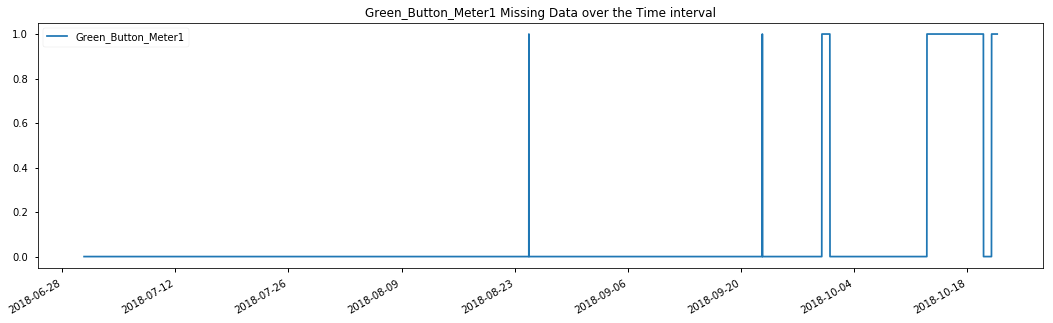

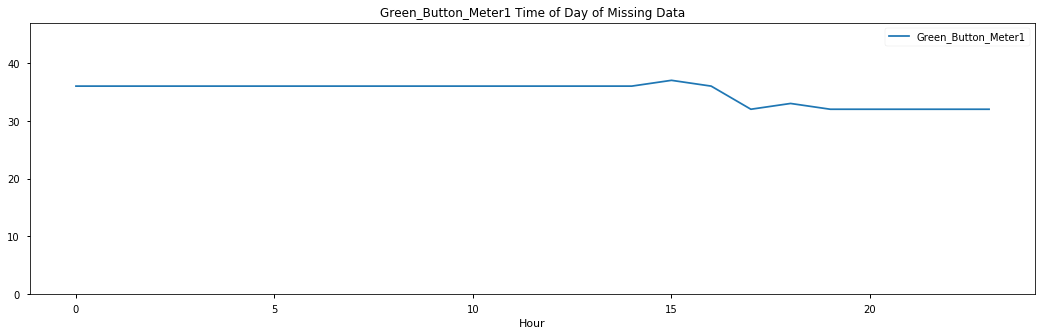

In [14]:
analyze_quality(obj2)

## Weather Meter Data Quality Analysis

Percentage Missing of Weather_Temperature_Sensor1 data: 3%
               Length Missing
count                      56
mean          0 days 01:37:30
std    0 days 03:34:32.889059
min           0 days 00:15:00
25%           0 days 00:15:00
50%           0 days 00:15:00
75%           0 days 01:00:00
max           0 days 18:00:00
                          Weather_Temperature_Sensor1 Length Missing
2018-06-30 17:15:00-07:00                           1       18:00:00
2018-07-03 17:15:00-07:00                           1       00:15:00
2018-07-07 15:15:00-07:00                           1       00:15:00
2018-07-10 23:45:00-07:00                           1       00:15:00
2018-07-12 15:30:00-07:00                           1       00:30:00
2018-07-16 04:30:00-07:00                           1       00:15:00
2018-07-18 09:45:00-07:00                           1       00:15:00
2018-07-21 19:30:00-07:00                           1       00:15:00
2018-07-25 08:15:00-07:00                         

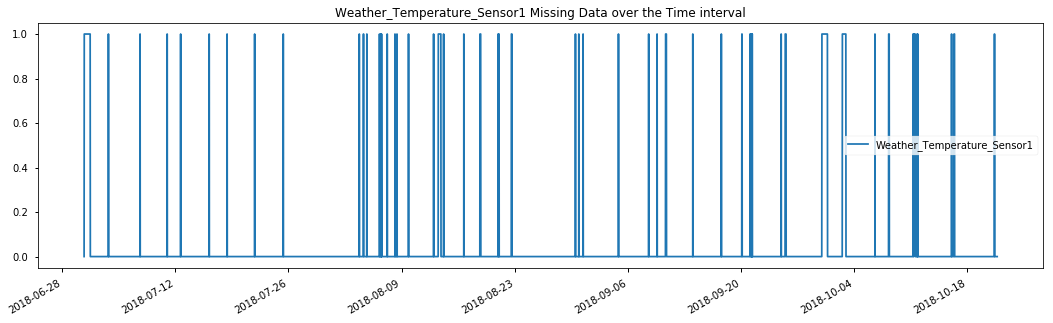

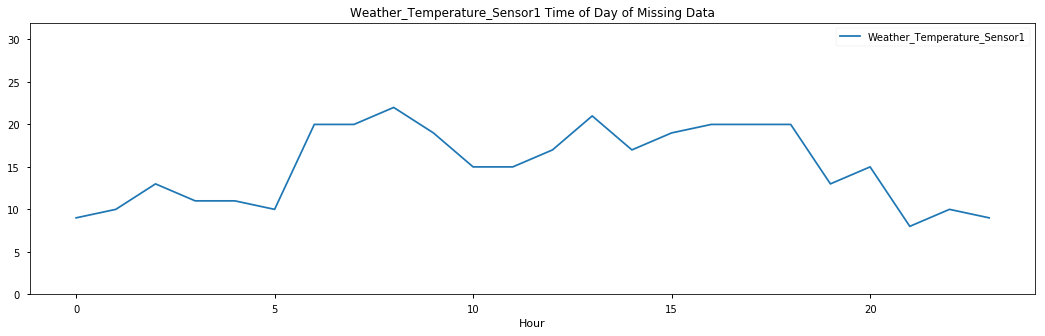

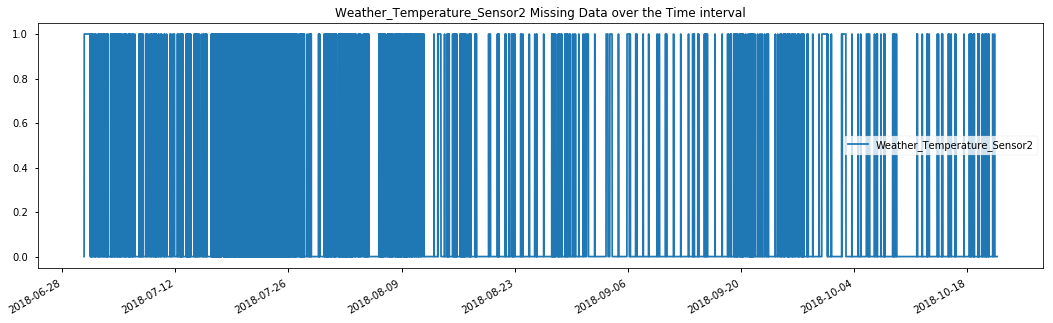

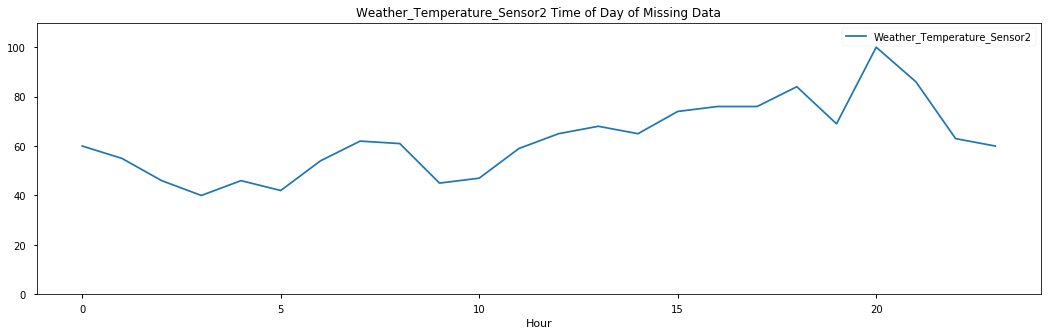

In [15]:
#analyze_quality(obj3.df.iloc[:,[0]])
analyze_quality(obj3)

Percentage Missing of HVAC_Zone_Northzone_tstat_temperature data: 3%
               Length Missing
count                       9
mean          0 days 10:40:00
std    0 days 15:42:04.729101
min           0 days 00:15:00
25%           0 days 00:15:00
50%           0 days 02:30:00
75%           0 days 16:30:00
max           2 days 00:15:00
                          HVAC_Zone_Northzone_tstat_temperature  \
2018-07-11 05:45:00-07:00                                     1   
2018-07-25 08:30:00-07:00                                     1   
2018-08-04 16:30:00-07:00                                     1   
2018-08-11 20:15:00-07:00                                     1   
2018-08-22 14:00:00-07:00                                     1   
2018-09-08 13:45:00-07:00                                     1   
2018-09-25 11:00:00-07:00                                     1   
2018-09-30 00:00:00-07:00                                     1   
2018-10-06 23:30:00-07:00                                 

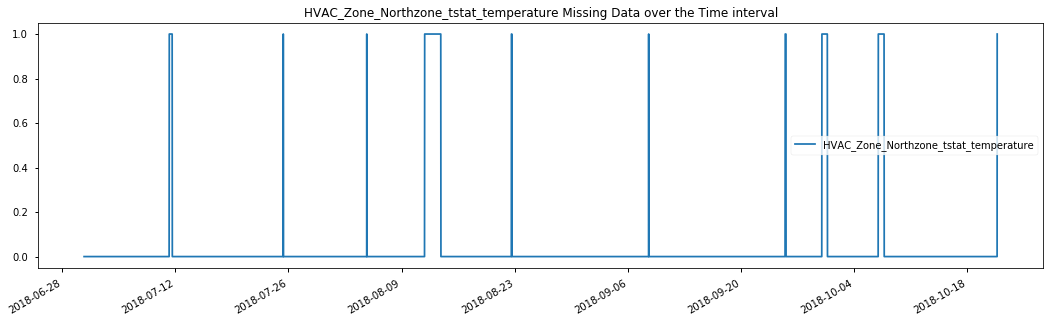

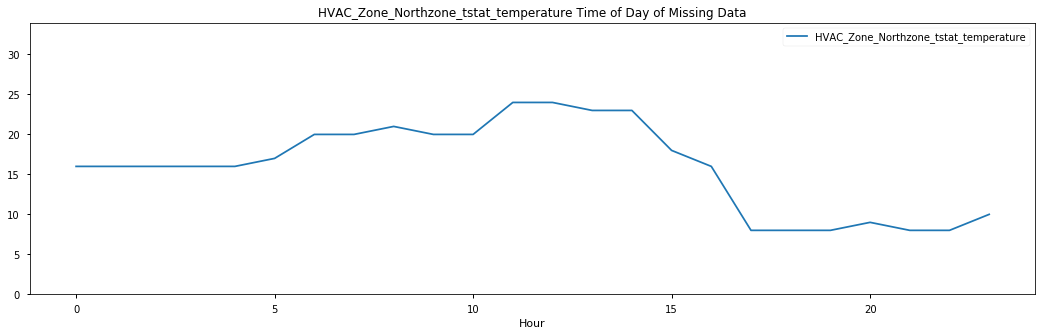

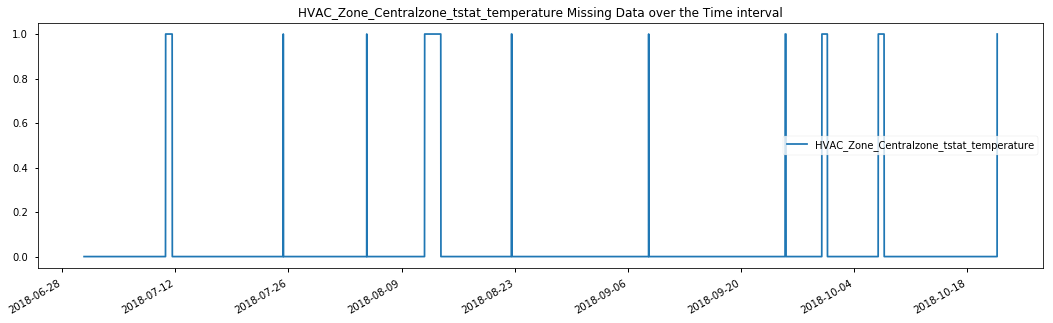

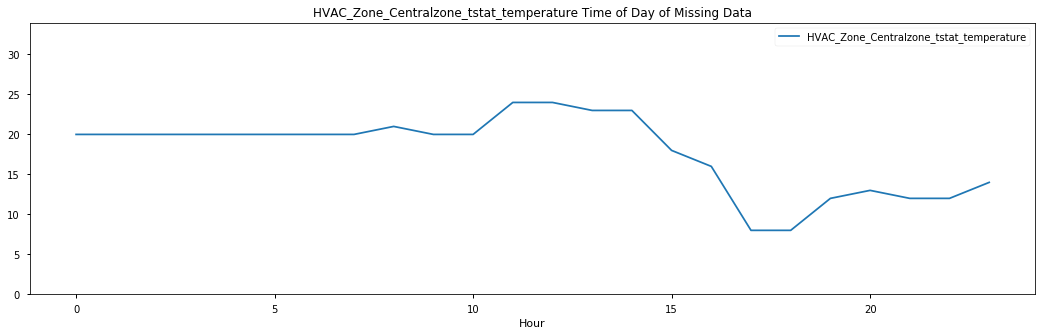

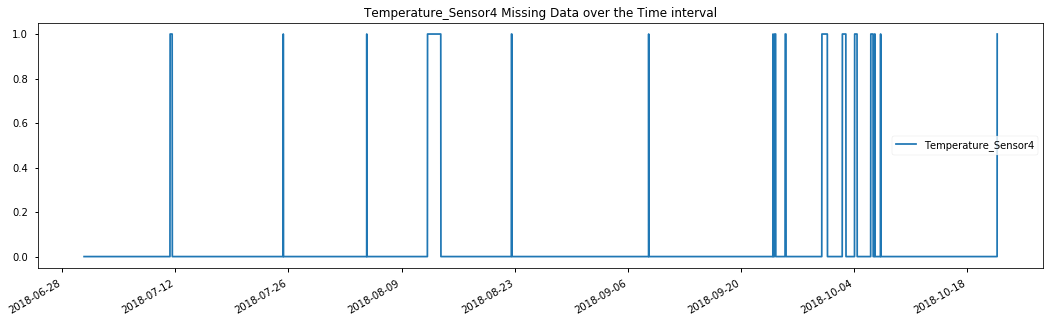

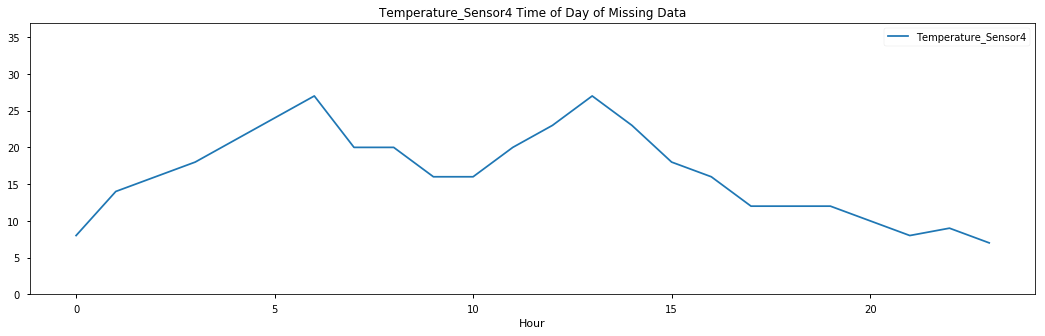

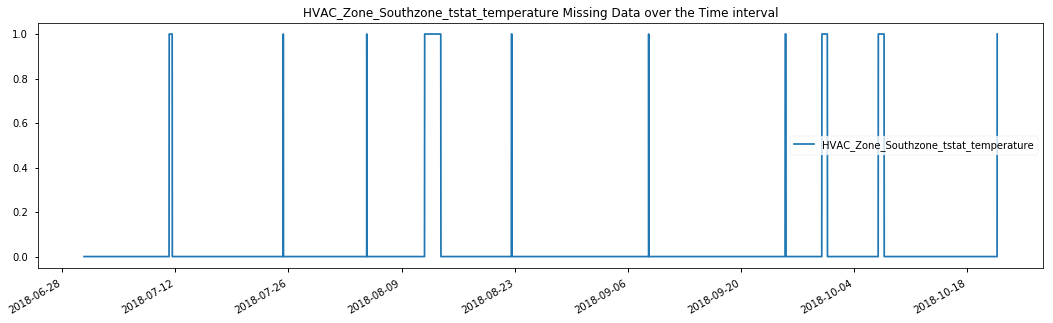

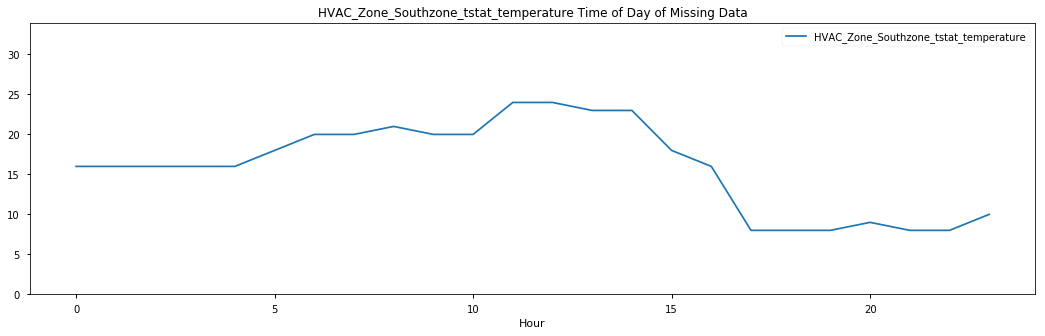

In [16]:
analyze_quality(obj4)

# Plotly Graphs

In [17]:
import ipywidgets as widgets
import plotly as py
import plotly.graph_objs as go
import numpy as np
from scipy import special

py.offline.init_notebook_mode(connected=True)

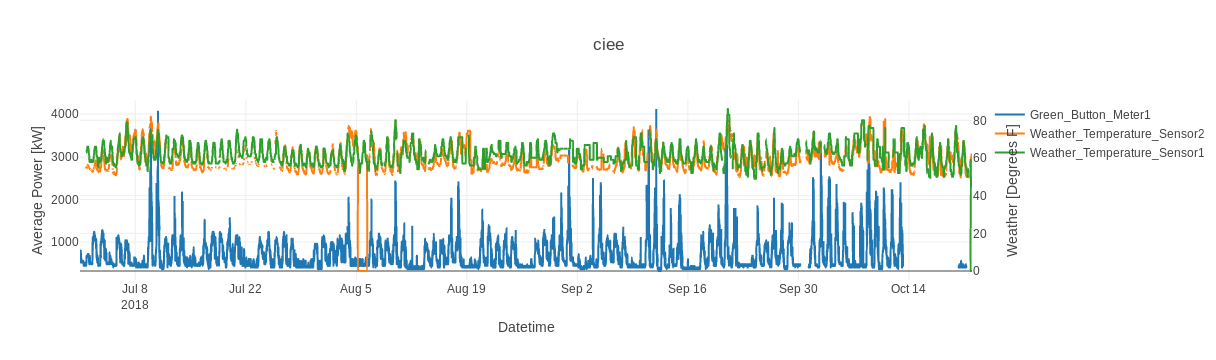

In [18]:
x=obj2.df.index   
layout=go.Layout(
    title=site,
    yaxis=dict(
    title='Average Power [kW]'
    ),
    yaxis2=dict(
    title='Weather [Degrees F]',
    overlaying='y',
    side='right'   
    ),
    xaxis=dict(
    title='Datetime'
    )
)
trace1=go.Scatter(
x=x,
    y=obj2.df.iloc[:,0],
    mode='lines',   # could put "markers' or 'lines+markers'
    name=str(obj2.df.columns[0]),
    line=dict(
       shape='spline'
    )
)

trace2=go.Scatter(
x=x,
    y=obj3.df.iloc[:,0],
    mode='lines',   # could put "markers' or 'lines+markers'
    name=str(obj3.df.columns[0]),
    yaxis='y2',
    line=dict(
       shape='spline'
    )
)

trace3=go.Scatter(
x=x,
    y=obj3.df.iloc[:,1],
    mode='lines',   # could put "markers' or 'lines+markers'
    name=str(obj3.df.columns[1]),
    yaxis='y2',
    line=dict(
       shape='spline'
    )
)

fig=go.Figure(data=[trace1, trace3, trace2], layout=layout)
py.offline.iplot(fig)